**Image recognition using Deep Learning - TensorFlow and Keras**

In [1]:
import tensorflow as tf

tf.__version__

'1.13.1'

In [0]:
mnist = tf.keras.datasets.mnist   ## 28x28 images of hand-written digits

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


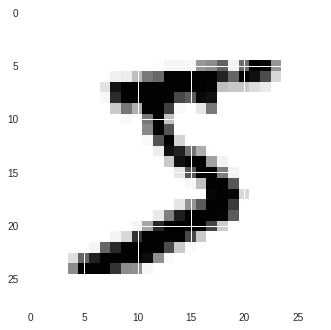

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

In [0]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

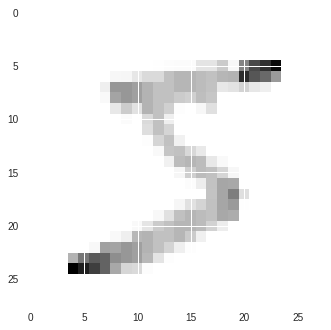

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

In [12]:
model = tf.keras.models.Sequential()    ## a basic feed-forward model
model.add(tf.keras.layers.Flatten())    ## faltten 28x28 into 1x784 input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  ## add hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  ## output layer


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train,y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2617 - acc: 0.9223
Epoch 2/3
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1073 - acc: 0.9674
Epoch 3/3
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0737 - acc: 0.9765


In [14]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.0963 - acc: 0.9708


[0.09631686116755009, 0.9708]

In [16]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.0963 - acc: 0.9708
0.09631686116755009
0.9708


In [0]:
model.save('number_reader.model')

In [22]:
new_model = tf.keras.models.load_model('number_reader.model')
predictions = new_model.predict(X_test)   ##make predictions
print(predictions)

[[1.2778778e-09 2.7186660e-08 5.3303215e-06 ... 9.9999273e-01
  2.5705651e-09 1.4483085e-07]
 [5.0711968e-08 3.2686078e-04 9.9967194e-01 ... 1.3571420e-09
  2.3471820e-07 1.1197756e-12]
 [4.9142665e-07 9.9985135e-01 1.7403847e-05 ... 7.6653945e-05
  2.0052330e-05 7.6656278e-07]
 ...
 [2.4890846e-07 4.5650418e-06 1.6692345e-06 ... 1.3914693e-04
  2.4736898e-06 6.9152913e-05]
 [2.5786894e-05 1.7351973e-05 6.6066212e-07 ... 7.9879690e-05
  2.4501006e-03 3.2315413e-08]
 [4.3923651e-06 5.0182571e-08 2.1424548e-06 ... 6.4134580e-11
  1.3331011e-08 3.9726826e-09]]


In [27]:
import numpy as np

print(np.argmax(predictions[6]))

4


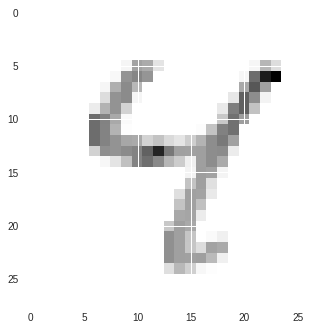

In [28]:
plt.imshow(X_test[6],cmap=plt.cm.binary)
plt.show()